# 13.3 US Baby Names 1880-2010

In [2]:
!cat /content/Babynames/yob1880.txt

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288
Annie,F,1258
Clara,F,1226
Ella,F,1156
Florence,F,1063
Cora,F,1045
Martha,F,1040
Laura,F,1012
Nellie,F,995
Grace,F,982
Carrie,F,949
Maude,F,858
Mabel,F,808
Bessie,F,794
Jennie,F,793
Gertrude,F,787
Julia,F,783
Hattie,F,769
Edith,F,768
Mattie,F,704
Rose,F,700
Catherine,F,688
Lillian,F,672
Ada,F,652
Lillie,F,647
Helen,F,636
Jessie,F,635
Louise,F,635
Ethel,F,633
Lula,F,621
Myrtle,F,615
Eva,F,614
Frances,F,605
Lena,F,603
Lucy,F,591
Edna,F,588
Maggie,F,582
Pearl,F,569
Daisy,F,564
Fannie,F,560
Josephine,F,544
Dora,F,524
Rosa,F,507
Katherine,F,502
Agnes,F,473
Marie,F,471
Nora,F,471
May,F,462
Mamie,F,436
Blanche,F,427
Stella,F,414
Ellen,F,411
Nancy,F,411
Effie,F,406
Sallie,F,404
Nettie,F,403
Della,F,391
Lizzie,F,388
Flora,F,365
Susie,F,361
Maud,F,345
Mae,F,344
Etta,F,323
Harriet,F,319
Sadie,F,317
Caroline,F,306
Katie,F,303
Lydia,F,302
Elsie,F,301
Kate,F,299
Susan,

In [5]:
import pandas as pd
names = pd.DataFrame(columns=['name', 'sex', 'births'])
names
for year in range(1880, 2011):
  names_y = pd.read_csv(f'//content/Babynames/yob{year}.txt', header=None, names=['name', 'sex', 'births'])
  names_y['year'] = year
  names = pd.concat([names, names_y])
names.head()

,name,sex,births,year
0,Mary,F,7065,1880.0
1,Anna,F,2604,1880.0
2,Emma,F,2003,1880.0
3,Elizabeth,F,1939,1880.0
4,Minnie,F,1746,1880.0


In [6]:
names["year"] = names["year"].astype(int)

In [7]:
names.head(10)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [8]:
names1880 = names[names["year"] == 1880]
names1880.groupby("sex").births.sum()

,births
sex,
F,90993
M,110493


In [13]:
total_births = names.pivot_table(values='births', index='year', columns='sex', aggfunc='sum')
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<Figure size 1200x800 with 0 Axes>

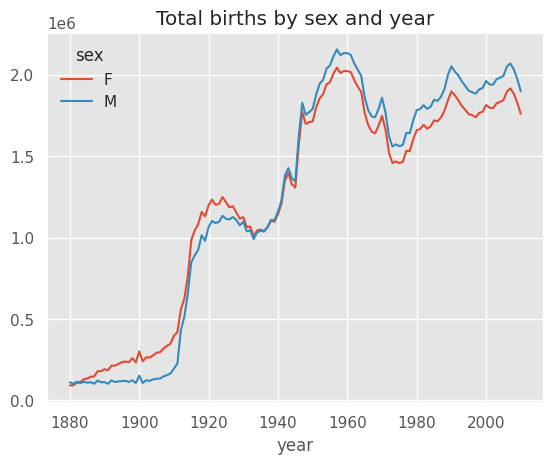

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
fig = plt.figure()
fig.set_size_inches(12, 8)
plt.style.use('ggplot')
total_births.plot(title='Total births by sex and year');

Column `prop` with the fraction of babies given each name relative to the total number of births

In [35]:
def add_proop(group):
  group["prop"] = group.births / group.births.sum()
  return group

names = names.groupby(["year", "sex"]).apply(add_proop)
names.head()

<ipython-input-35-521d17a6a0b4>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(["year", "sex"]).apply(add_proop)


name sex births  year      prop
year sex                                        
1880 F   0       Mary   F   7065  1880  0.077643
         1       Anna   F   2604  1880  0.028618
         2       Emma   F   2003  1880  0.022013
         3  Elizabeth   F   1939  1880  0.021309
         4     Minnie   F   1746  1880  0.019188

When performing a group operation like this, it's often valuable to do a sanity check, verifying that the prop column sums to 1

In [43]:
names = names.reset_index(drop=True) #drop elimina los indices correspondientes y no los inserta en columnas
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [42]:
names.groupby(["year", "sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: object

Extract the top 1000 names for each sex/year combination

In [44]:
def get_top1000(group):
  return group.sort_values(by="births", ascending=False)[:1000]

top1000 = names.groupby(["year", "sex"]).apply(get_top1000)
top1000.head()

<ipython-input-44-e62550215df3>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = names.groupby(["year", "sex"]).apply(get_top1000)


name sex births  year      prop
year sex                                        
1880 F   0       Mary   F   7065  1880  0.077643
         1       Anna   F   2604  1880  0.028618
         2       Emma   F   2003  1880  0.022013
         3  Elizabeth   F   1939  1880  0.021309
         4     Minnie   F   1746  1880  0.019188

In [45]:
#Drop the group index
top1000 = top1000.reset_index(drop=True)
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


## Analyzing Naming Trends

In [46]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

#Number of Jhons or Marys for each year, form a pivot table of the total number of births by year and name
total_births = top1000.pivot_table(values='births', index='year', columns='name', aggfunc='sum')
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: object(6868)
memory usage: 6.9+ MB


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

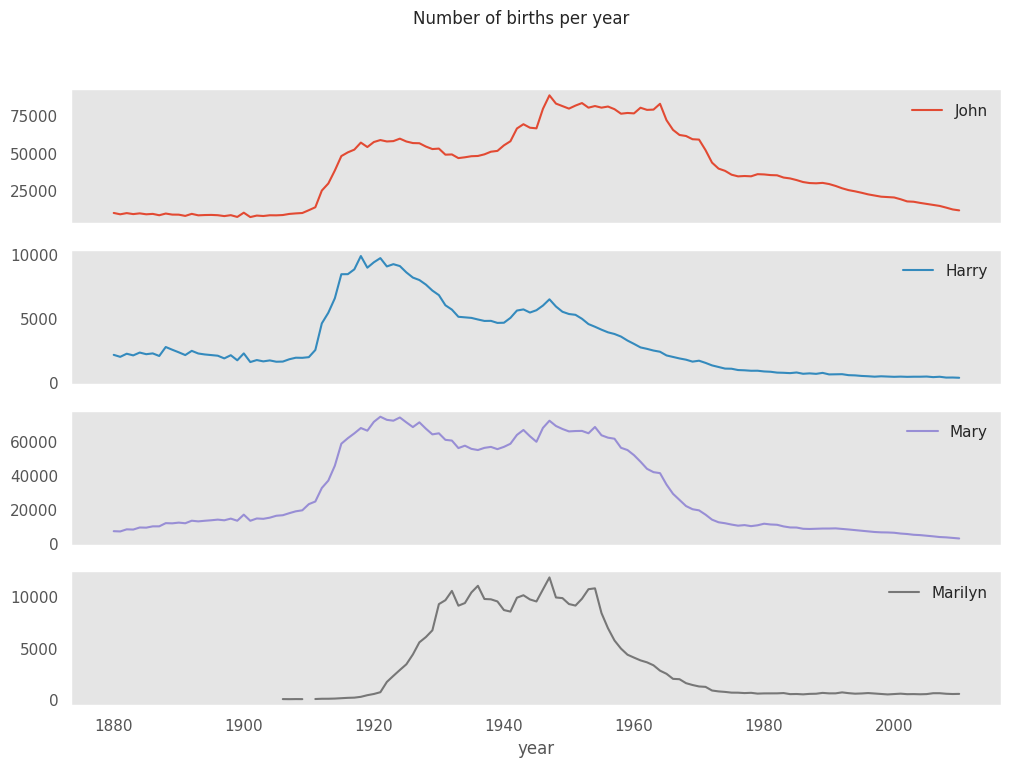

In [51]:
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
subset.plot(subplots=True, figsize=(12, 8), grid=False, title="Number of births per year")
#Subplots plotea cada nombre en diferente grafica

In [66]:
#Conocer los nombres mas comunes de la ultima decada
last_decade = top1000[top1000["year"] >= 2000]
last_decade[last_decade["sex"] == "F"].groupby("name").size().sort_values(ascending=False).head()

,0
name,
Aaliyah,11
Kathleen,11
Karissa,11
Karla,11
Karlee,11


## Measuring the increase in naming diversity

The decrease in plots is that fewer parents are choosing common names for their children.

In [70]:
table = top1000.pivot_table(values='prop', index='year', columns='sex', aggfunc='sum')
table.head()

sex,F,M
year,,
1880,1.0,0.997375
1881,1.0,1.0
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539


<Axes: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='year'>

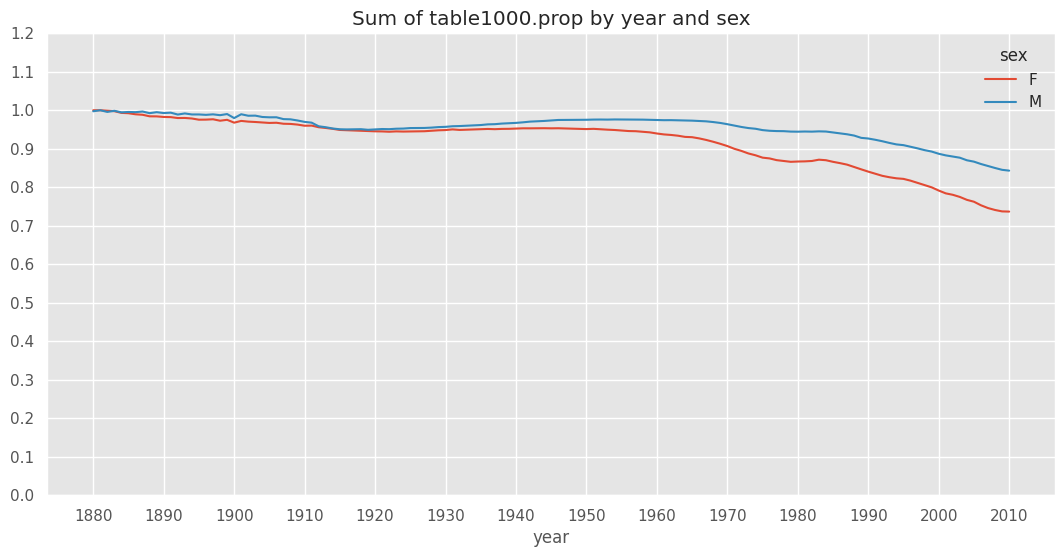

In [74]:
import numpy as np
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13),figsize=(13,6), xticks=range(1880, 2020, 10))

In [75]:
df = boys[boys["year"] == 2010]
df.head()

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887


We want to know how many of the most popular names it takes to reach 50%. Taking the cumulative sum, `cumsum` and then calling the method `searchsorted`

In [76]:
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()
prop_cumsum[:10]

,prop
260877,0.011523
260878,0.020934
260879,0.029959
260880,0.03893
260881,0.047817
260882,0.056579
260883,0.065155
260884,0.073414
260885,0.081528
260886,0.089621


In [86]:
prop_cumsum.searchsorted(0.5) + 1

117

By contrast, in 1900 this number was much smaller

In [87]:
df = boys[boys["year"] == 1900]
in1900 = df["prop"].sort_values(ascending=False).cumsum()
in1900.searchsorted(0.5) + 1

25

You can apply this operation to each year/sex combination, `groupby` those fields and `apply` a function returning the count for each group

In [88]:
def get_quantile_count(group, q=0.5):
  group = group.sort_values(by="prop", ascending=False)
  return group["prop"].cumsum().searchsorted(q) + 1

diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()
diversity.head()

<ipython-input-88-3be9ddbdfdbd>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)


sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

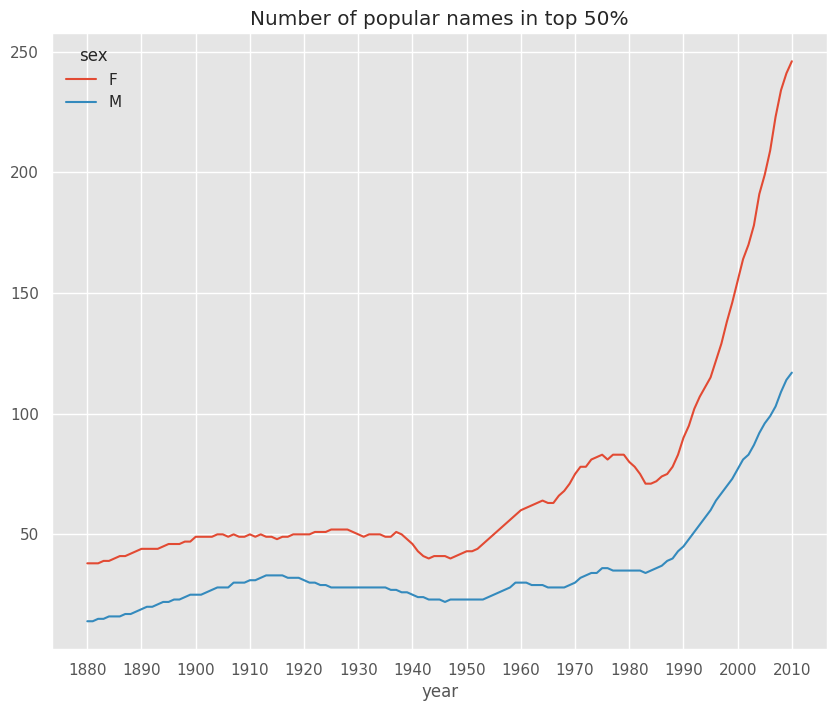

In [89]:
diversity.plot(title="Number of popular names in top 50%", figsize=(10,8), xticks=range(1880, 2020, 10))

## The "last letter" revolution

In [90]:
def get_last_letter(name):
  return name[-1]

last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"
last_letters.head()

,last_letter
0,y
1,a
2,a
3,h
4,e


In [93]:
table = names.pivot_table(values="births", index=last_letters, columns=["sex", "year"], aggfunc=sum, fill_value=0)
table.head()

<ipython-input-93-6a006d88d262>:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = names.pivot_table(values="births", index=last_letters, columns=["sex", "year"], aggfunc=sum, fill_value=0)
<ipython-input-93-6a006d88d262>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  table = names.pivot_table(values="births", index=last_letters, columns=["sex", "year"], aggfunc=sum, fill_value=0)


sex              F                                                          \
year          1880   1881   1882   1883   1884   1885   1886   1887   1888   
last_letter                                                                  
a            31446  31581  36536  38330  43680  45408  49100  48942  59442   
b                0      0      0      0      0      0      0      0      0   
c                0      0      5      5      0      0      0      0      0   
d              609    607    734    810    916    862   1007   1027   1298   
e            33378  34080  40399  41914  48089  49616  53884  54353  66750   

sex                 ...       M                                          \
year          1889  ...    2001    2002    2003    2004    2005    2006   
last_letter         ...                                                   
a            58631  ...   39124   38815   37825   38650   36838   36156   
b                0  ...   50950   49284   48065   45914   43144   42600   
c                0  ...   27113   27238   27697   26778   26078   26635   
d             1374  ...   60838   55829   53391   51754   50670   51410   
e            66663  ...  145395  144651  144769  142098  141123  142999   

sex                                          
year           2007    2008    2009    2010  
last_letter                                  
a             34654   32901   31430   28438  
b             42123   39945   38862   38859  
c             26864   25318   24048   23125  
d             50595   47910   46172   44398  
e            143698  140966  135496  129012  

[5 rows x 262 columns]

Select three representative years

In [95]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year') #Reindex to substract the columns and keeping the same stucture index
subtable.head()

sex               F                      M                
year           1910    1960    2010   1910    1960    2010
last_letter                                               
a            108376  691247  670605    977    5204   28438
b                 0     694     450    411    3912   38859
c                 5      49     946    482   15476   23125
d              6750    3729    2607  22111  262112   44398
e            133569  435013  313833  28655  178823  129012

In [96]:
#normalize the table by total births
subtable.sum()

sex  year
F    1910     396416
     1960    2022062
     2010    1759010
M    1910     194198
     1960    2132588
     2010    1898382
dtype: int64

In [97]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b            0.000000  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f            0.000000  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j            0.000000  0.000000  0.000090  0.000000  0.000000  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q            0.000000  0.000000  0.000030  0.000000  0.000000  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v            0.000000  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

Make bar plots for each sex, broked down by year

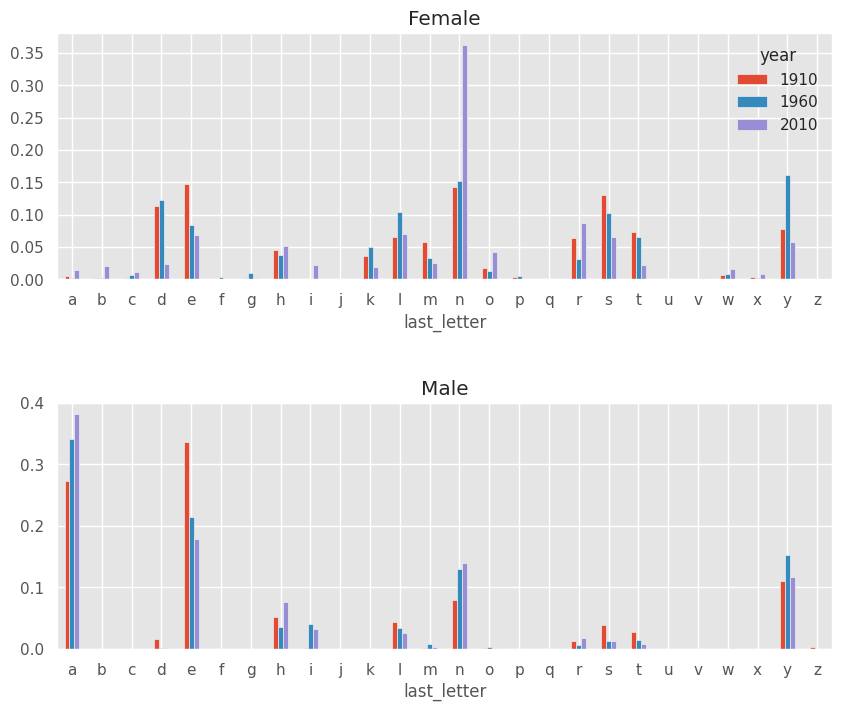

In [104]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,1, figsize=(10,8))
fig.subplots_adjust(hspace=0.5)
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Female")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Male", legend=False);

In [108]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T #Transpose to use as time series
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


Trends over time again with its `plot` method

<Axes: xlabel='year'>

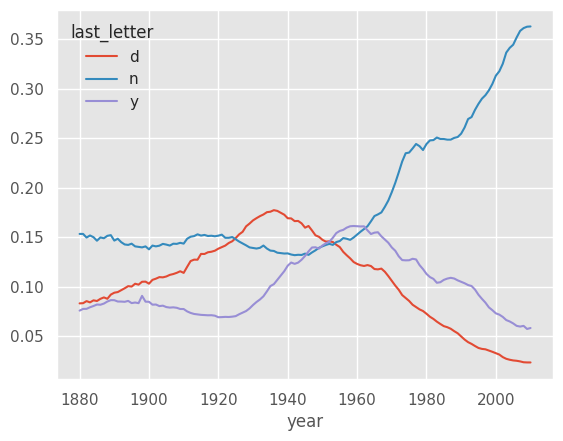

In [109]:
dny_ts.plot()

## Boy names that become girl names (and viceversa)

One example is Lesley or Leslie. Going back to the top1000 Df, I compute a list of names occuring in the dataset starting with "LESL"

In [110]:
all_names = pd.Series(top1000["name"].unique())
lesley_like = all_names[all_names.str.lower().str.contains("lesl")]
lesley_like

,0
632,Leslie
2294,Lesley
4262,Leslee
4728,Lesli
6103,Lesly


Filter down just those names and sum births grouped by name to see the relative frequencies

In [111]:
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

,births
name,
Leslee,1082
Lesley,35022
Lesli,929
Leslie,370429
Lesly,10067


In [116]:
table = filtered.pivot_table(values="births", index="year", columns="sex", aggfunc="sum")
table.head()

sex,F,M
year,,
1880,8,79
1881,11,92
1882,9,128
1883,7,125
1884,15,125


In [114]:
table = table.div(table.sum(axis='columns'), axis='index')
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


Lastly it's now possible to make a plot of the breakdown by sex overtime

<Axes: xlabel='year'>

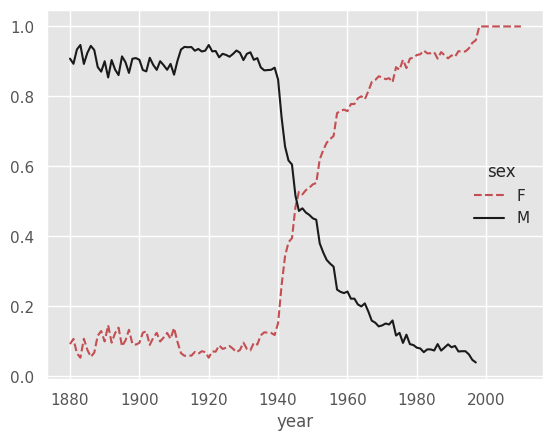

In [115]:
table.plot(style={"M": 'k-', "F": "r--"})